<a href="https://colab.research.google.com/github/lovgon/Python-for-Complex-Problems/blob/main/05_11_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Заглянем глубже: кластеризация методом k-средних

В нескольких предыдущих разделах мы рассматривали только одну разновидность машинного обучения без учителя — понижение размерности. В этом разделе мы перейдем к другому классу моделей машинного обучения без учителя — алгоритмам кластеризации. Алгоритмы кластеризации нацелены на то, чтобы найти, исходя из свойств данных, оптимальное разбиение или дискретную маркировку групп точек.

В библиотеке Scikit-Learn и других местах имеется множество алгоритмов кластеризации, но, вероятно, наиболее простой для понимания — алгоритм кластеризации методом k-средних (k-means clustering), реализованный в классе sklearn.cluster.KMeans.

Начнем с обычных импортов:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

## Знакомство с методом k-средних

Алгоритм k-средних выполняет поиск заранее заданного количества кластеров в немаркированном многомерном наборе данных. Достигается это с помощью простого представления о том, что такое оптимальная кластеризация.

- «Центр кластера» — арифметическое среднее всех точек, относящихся к этому кластеру.
- Каждая точка ближе к центру своего кластера, чем к центрам других кластеров.

Эти два допущения составляют основу модели метода k-средних. Далее мы рассмотрим детальнее, каким именно образом алгоритм находит это решение, а пока возьмем простой набор данных и посмотрим на результаты работы метода k-средних для него.

Во-первых, сгенерируем двумерный набор данных, содержащий четыре отдельных «пятна». Чтобы подчеркнуть отсутствие учителя в этом алгоритме, мы не будем включать метки в визуализацию (рис. 5.110 - Данные для демонстрации кластеризации):

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


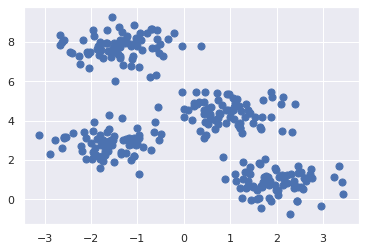

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Визуально выделить здесь четыре кластера не представляет труда. Алгоритм k-средних делает это автоматически, используя в библиотеке Scikit-Learn API статистических оценок:

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Визуализируем результаты, выведя на график окрашенные в соответствии с метками данные. Нарисуем найденные оценивателем метода k-средних центры кластеров (рис. 5.111 - Центры кластеров метода k-средних с окрашенными в разные цвета кластерами):

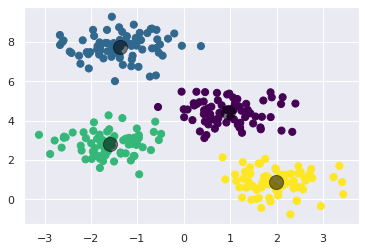

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Хорошая новость состоит в том, что алгоритм k-средних (по крайней мере в этом простом случае) задает соответствие точек кластерам очень схоже с тем, как мы бы могли сделать это визуально. Но у вас может возникнуть вопрос: как этому  алгоритму удалось найти кластеры так быстро? В конце концов, количество возможных сочетаний точек и кластеров зависит экспоненциально от числа точек данных, так что поиск методом полного перебора оказался бы чрезвычайно ресурсозатратным. Поиск методом полного перебора здесь не требуется. Вместо него в типичном варианте метода k-средних применяется интуитивно понятный подход, известный под названием «максимизация математического ожидания» (expectation-maximization, EM).

## Алгоритм k-средних: максимизация математического ожидания

Максимизация математического ожидания (EM) — мощный алгоритм, встречающийся во множестве контекстов науки о данных. Метод k-средних — особенно простое и понятное приложение этого алгоритма, и мы рассмотрим его здесь вкратце. Подход максимизации математического ожидания состоит из следующей процедуры.

1. Выдвигаем гипотезу о центрах кластеров.
2. Повторяем до достижения сходимости:
  1. E-шаг: приписываем точки к ближайшим центрам кластеров;
  2. M-шаг: задаем новые центры кластеров в соответствии со средними значениями.

E-шаг, или шаг ожидания (expectation), назван так потому, что включает актуализацию математического ожидания того, к каким кластерам относятся точки.

M-шаг, или шаг максимизации (maximization), назван так потому, что включает максимизацию некоторой целевой функции, описывающей расположения центров кластеров. В таком случае максимизация достигается путем простого усреднения данных в кластере.

Этому алгоритму посвящена обширная литература, но если коротко, то можно подвести его итоги следующим образом: при обычных обстоятельствах каждая итерация шагов E и M всегда будет приводить к улучшению оценки показателей кластера. Визуализировать этот алгоритм можно так, как показано на рис. 5.112 - Визуализация EM-алгоритма для метода k-средних.

Для показанных на рис. 5.112 конкретных начальных значений кластеры сходятся всего за три итерации. Интерактивную версию рисунка можно увидеть в онлайн-приложении (https://github.com/jakevdp/PythonDataScienceHandbook).

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.11-expectation-maximization.png?raw=1)

Алгоритм k-средних достаточно прост для того, чтобы уместиться в нескольких
строках кода.

Вот простейшая его реализация (рис. 5.113 - Данные, маркированные с помощью метода k-средних):

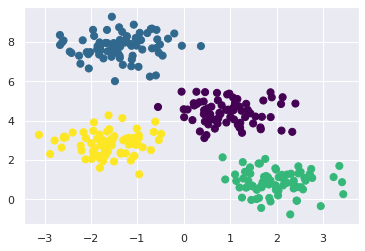

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Самые проверенные реализации выполняют «под капотом» немного больше действий, но основное представление о методе максимизации математического ожидания предыдущая функция дает.

### Предупреждения относительно метода максимизации математического ожидания
При использовании алгоритма максимизации математического ожидания следует иметь в виду несколько нюансов.

#### Глобально оптимальный результат может оказаться недостижимым в принципе
Во-первых, хотя процедура EM гарантированно улучшает результат на каждом шаге, уверенности в том, что она ведет к глобально наилучшему решению, нет. Например, если мы воспользуемся в нашей простой процедуре другим начальным значением для генератора случайных чисел, полученные начальные гипотезы приведут к неудачным результатам (рис. 5.114 - Пример плохой сходимости в методе k-средних):

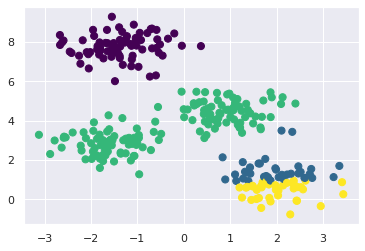

In [6]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

В этом случае EM-метод сошелся к глобально неоптимальной конфигурации, поэтому его часто выполняют для нескольких начальных гипотез, что и делает по умолчанию библиотека Scikit-Learn (это задается с помощью параметра n_init, по умолчанию имеющего значение 10).

#### Количество кластеров следует выбирать заранее
Еще одна часто встречающаяся проблема с методом k-средних заключается в том, что ему необходимо сообщить, какое количество кластеров вы ожидаете: он не умеет вычислять количество кластеров на основе данных. Например, если предложить алгоритму выделить шесть кластеров, он с радостью это сделает и найдет шесть оптимальных кластеров (рис. 5.115 - Пример неудачного выбора количества кластеров):

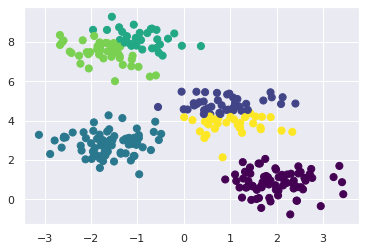

In [7]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Осмысленный ли результат получен — сказать трудно. Один из полезных в этом случае и интуитивно довольно понятных подходов, который мы не станем обсуждать подробно, — силуэтный анализ (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

В качестве альтернативы можно воспользоваться более сложным алгоритмом кластеризации с лучшим количественным показателем зависимости качества аппроксимации от количества кластеров (например, смесь Гауссовых распределений, см. раздел «Заглянем глубже: смеси Гауссовых распределений» данной главы) или с возможностью выбора приемлемого количества кластеров (например, методы DBSCAN, сдвиг среднего или распространения аффинности (affinity propagation), находящиеся в подмодуле sklearn.cluster).

#### Применение метода k-средних ограничивается случаем линейных границ кластеров

Базовое допущение модели k-средних (точки должны быть ближе к центру их собственного кластера, чем других) означает, что этот алгоритм зачастую будет неэффективен в случае сложной геометрии кластеров.

В частности, границы между кластерами в методе k-средних всегда будут линейными, а значит, он будет плохо работать в случае более сложных границ.

Рассмотрим следующие данные и найденные для них при обычном подходе метода k-средних метки кластеров (рис. 5.116 - Неудача метода k-средних в случае нелинейных границ):

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

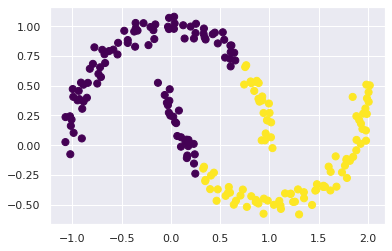

In [9]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Ситуация напоминает обсуждавшееся в разделе «Заглянем глубже: метод опорных векторов» этой главы, где мы использовали ядерное преобразование для проецирования данных в пространство более высокой размерности, в котором возможно линейное разделение. Можно попробовать воспользоваться той же уловкой, чтобы метод k-средних стал распознавать нелинейные границы.

Одна из версий этого ядерного метода k-средних реализована в библиотеке Scikit-Learn в оценивателе SpectralClustering. Она использует граф ближайших соседей для вычисления представления данных более высокой размерности, после чего задает соответствие меток с помощью алгоритма k-средних (рис. 5.117 - . Нелинейные границы, обнаруженные с помощью SpectralClustering):

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


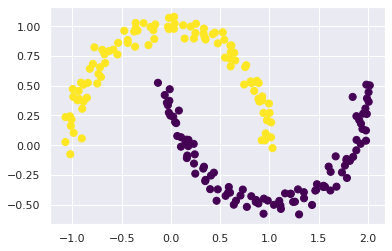

In [10]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Как видим, метод k-средних с помощью этого ядерного преобразования способен обнаруживать более сложные нелинейные границы между кластерами.

#### Метод k-средних работает довольно медленно в случае большого количества выборок

Алгоритм может работать довольно медленно при росте числа выборок, ведь при каждой итерации методу k-средних необходимо обращаться к каждой точке в наборе данных. Интересно, можно ли смягчить это требование относительно использования всех данных при каждой итерации? Например, можно применить лишь подмножество данных для корректировки центров кластеров на каждом шаге. Эта идея лежит в основе пакетных алгоритмов k-средних, один из которых реализован в классе sklearn.cluster.MiniBatchKMeans. Их интерфейс не отличается от обычного KMeans. В дальнейшем мы рассмотрим пример их использования.

## Примеры

При соблюдении некоторой осторожности в плане вышеупомянутых ограничений можно успешно использовать метод k-средних во множестве ситуаций. Рассмотрим несколько примеров.

### Пример 1: применение метода k-средних для рукописных цифр

Для начала рассмотрим применение метода k-средних к тем же простым данным по цифрам, которые мы уже видели в разделах «Заглянем глубже: деревья принятия решений и случайные леса» и «Заглянем глубже: метод главных компонент» данной главы. Мы попробуем воспользоваться методом k-средних для распознания схожих цифр без использования информации об исходных метках. Это напоминает первый шаг извлечения смысла нового набора данных, для которого отсутствует какая-либо априорная информации о метках.

Начнем с загрузки цифр, а затем перейдем к поиску кластеров с помощью алгоритма KMeans. Напомним, что набор данных по цифрам состоит из 1797 выборок с 64 признаками, где каждый из признаков представляет собой яркость одного пиксела в изображении размером 8 × 8:

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Кластеризация выполняется так же, как и ранее:

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

В результате мы получили десять кластеров в 64-мерном пространстве. Обратите внимание, что и центры кластеров представляют собой 64-мерные точки, а значит, их можно интерпретировать как «типичные» цифры в кластере. Посмотрим, что представляют собой эти центры кластеров (рис. 5.118 - Центры кластеров):

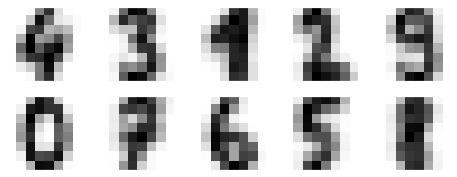

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Как видим, алгоритм KMeans даже без меток способен определить кластеры, чьи центры представляют собой легко узнаваемые цифры, возможно, за исключением 1 и 8.

В силу того что алгоритм k-средних ничего не знает о сущности кластеров, метки 0–9 могут оказаться перепутаны местами. Исправить это можно, задав соответствие всех полученных меток кластеров имеющимся в них фактическим меткам:

In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Теперь можно проверить, насколько точно кластеризация без учителя определила подобие цифр в наших данных:

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

С помощью простого алгоритма k-средних мы определили правильную группировку для почти 80 % исходных цифр!

Посмотрим на матрицу различий (рис. 5.119 - Матрица различий для классификатора методом k-средних):

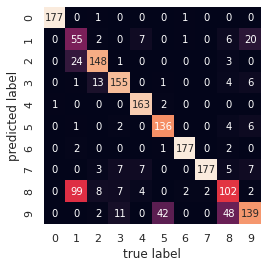

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Как и можно было ожидать, судя по визуализированным ранее центрам кластеров, больше всего путаницы между единицами и восьмерками. Но все равно, с помощью метода k-средних мы фактически создали классификатор цифр без каких-либо известных меток!

Попробуем пойти еще дальше. Воспользуемся для предварительной обработки данных до выполнения k-средних алгоритмом стохастического вложения соседей на основе распределения Стьюдента (t-SNE), упоминавшимся в разделе «Заглянем глубже: обучение на базе многообразий» этой главы. t-SNE — нелинейный алгоритм вложения, особенно хорошо умеющий сохранять точки внутри кластеров. Посмотрим, как он работает:

In [17]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9371174179187535

Точность, даже без использования меток, составляет почти 94 %. При разумном использовании алгоритмы машинного обучения без учителя демонстрируют отличные результаты: они могут извлекать информацию из набора данных даже тогда, когда сделать это вручную или визуально очень непросто.

### Пример 2: использование метода k-средних для сжатия цветов

Одно из интересных приложений кластеризации — сжатие цветов в изображениях.

Например, допустим, что у нас есть изображение с миллионами цветов. Почти во всех изображениях большая часть цветов не используется и цвета многих пикселов изображения будут похожи или даже совпадать. Например, рассмотрим изображение, показанное на рис. 5.120 - Исходное изображение, взятом из модуля datasets библиотеки Scikit-Learn (для работы следующего кода у вас должен быть установлен пакет pillow языка Python):

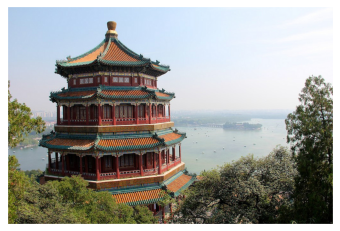

In [18]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

Само изображение хранится в трехмерном массиве размера (высота, ширина, RGB), содержащем вклад в цвет по красному/синему/зеленому каналам в виде целочисленных значений от 0 до 255:

In [19]:
china.shape

(427, 640, 3)

Этот набор пикселов можно рассматривать как облако точек в трехмерном цветовом пространстве. Изменим форму данных на [n_samples × n_features] и масштабируем шкалу цветов так, чтобы они располагались между 0 и 1:

In [20]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Визуализируем эти пикселы в данном цветовом пространстве, используя подмножество из 10 000 пикселов для быстроты работы (рис. 5.121 - Распределение пикселов в цветовом пространстве RGB):

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

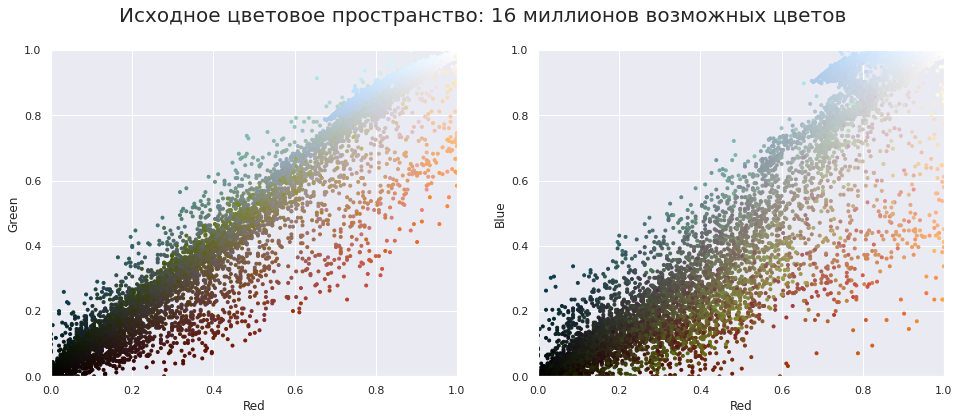

In [22]:
plot_pixels(data, title='Исходное цветовое пространство: 16 миллионов возможных цветов')

Теперь уменьшим количество цветов с 16 миллионов до 16 путем кластеризации методом k-средних на пространстве пикселов. Так как наш набор данных очень велик, воспользуемся мини-пакетным методом k-средних, который вычисляет результат гораздо быстрее, чем стандартный метод k-средних путем работы с подмножествами набора данных (рис. 5.122 - Шестнадцать кластеров в цветовом пространстве RGB):

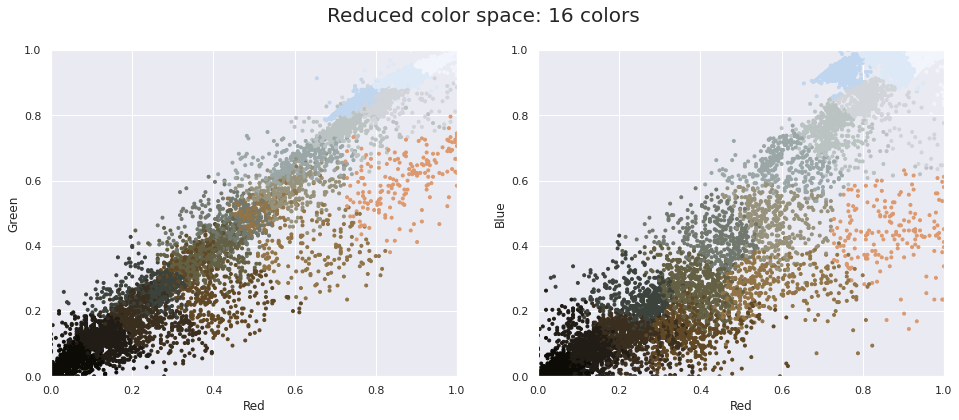

In [23]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

В результате исходные пикселы перекрашиваются в другие цвета: каждый пиксел получает цвет ближайшего центра кластера. Рисуя эти новые цвета в пространстве изображения вместо пространства пикселов, видим эффект от перекрашивания (рис. 5.123 - Полноцветное изображение (слева) по сравнению с 16-цветным (справа)).

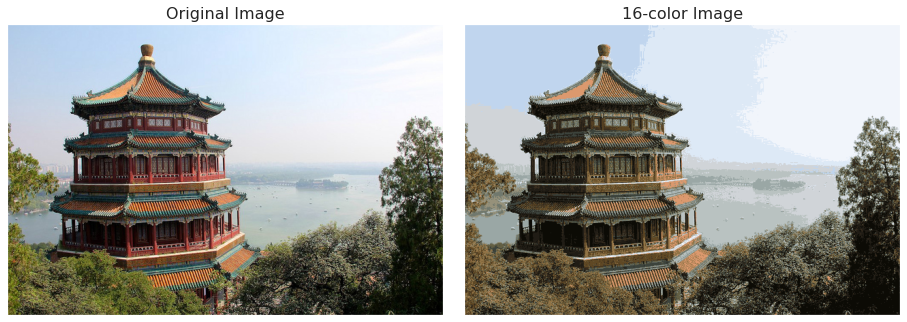

In [24]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Некоторые детали в изображении справа утрачены, но изображение в целом остается вполне узнаваемым. Коэффициент сжатия этого изображения — почти 1 миллион! Существуют лучшие способы сжатия информации в изображениях, но этот пример демонстрирует возможности творческого подхода к методам машинного обучения без учителя, таким как метод k-средних.